In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [12]:
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])

### Example 1 - No consideration for structure

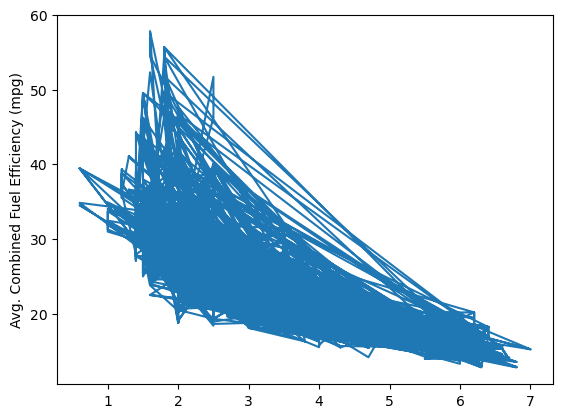

In [6]:
plt.errorbar(data=df, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### Example 2 - Structure considerations

In [7]:
df['displ'].describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [8]:
# Set bin edges, compute centers
bin_size = 0.2
bin_edges = np.arange(0.6, 7+bin_size, bin_size)
bin_centers = bin_edges[:-1] + bin_size/2

# Cut the bin values into discrete intervals. Returns a Series object as an ordered categorical data type.
displ_binned = pd.cut(df['displ'], bin_edges, include_lowest=True)
displ_binned.head()

0    (3.6, 3.8]
1    (1.8, 2.0]
2    (3.4, 3.6]
3    (3.4, 3.6]
4    (2.2, 2.4]
Name: displ, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

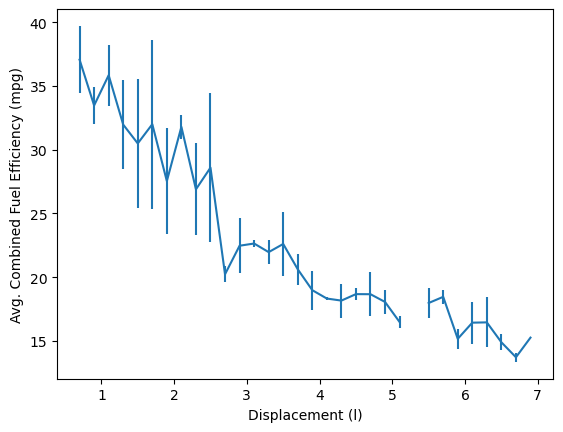

In [9]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = df['comb'].groupby(displ_binned).mean()
comb_std = df['comb'].groupby(displ_binned).std() # standard error of the mean, uses N-1 in denominator as default

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')
plt.xlabel('Displacement (l)');

### Example 3 - Multivariate example (two quantitative & one categorical)

In [ ]:
def mean_poly(x, y, bins=10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    means = y.groupby(data_bins).mean()
    # plot the bins and their means
    plt.errorbar(x=bin_centers, y=means, **kwargs)

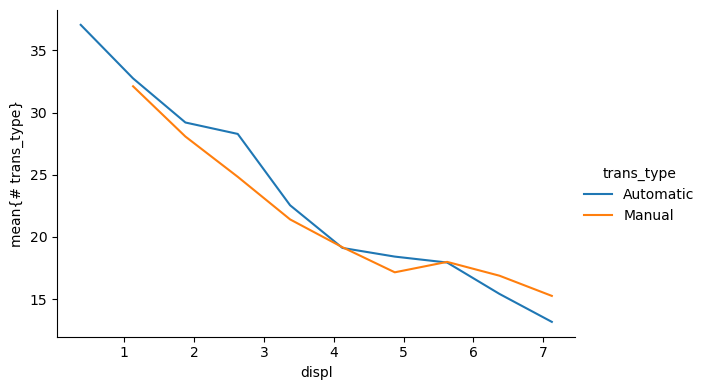

In [27]:
bin_edges = np.arange(0, 8, .75)
g = sns.FacetGrid(data=df, hue='trans_type', height=4, aspect=1.5)
g.map(mean_poly, "displ", "comb", bins=bin_edges)
g.set_ylabels('mean{# trans_type}')
g.add_legend();